# Project Name: Reducing Dimensionality of the MNIST Dataset with PCA for Handwritten Digit Cluster Visualization and effectiveness in classification.

**Overview:**
This educational project introduces students to dimensionality reduction techniques, specifically Principal Component Analysis (PCA), applied to the MNIST dataset of handwritten digits. Students will explore how PCA simplifies high-dimensional data and visualize distinct clusters of handwritten digits effectively and how it helps in effective classification.

**You have:**
* MNIST dataset containing images of handwritten digits (28x28 pixels, grayscale).
* Basic proficiency in Python, NumPy, scikit-learn, and matplotlib.

**We will:**
1. Preprocess the MNIST dataset, including reshaping image data and normalizing pixel values.
2. Implement PCA to reduce dimensionality, focusing on key parameters such as explained variance and principal component selection.
3. Visualize the PCA-reduced dataset using scatter plots in both 2D and 3D spaces, clearly illustrating distinct clusters of digits and assessing PCA’s effectiveness.
4. Apply classification algorihtms

**Goal:**
Students will build a strong understanding of PCA, learn effective techniques for visualizing complex datasets, and develop the analytical skills necessary for interpreting and evaluating dimensionality reduction results in practical scenarios.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time
import plotly.express as px
import base64
from IPython.display import display, HTML
import os
import warnings
warnings.filterwarnings("ignore")

## Notebook Utility

In [3]:
image_paths = ["PCA_gif.gif", "PCA1.png", "PCA2.png", "PCA3.png", "PCA4.webp", "PCA5.webp"]
image_size = [1000, 700, 700, 400, 600, 500]
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open("../input/images/"+path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)

## Theoretical Background


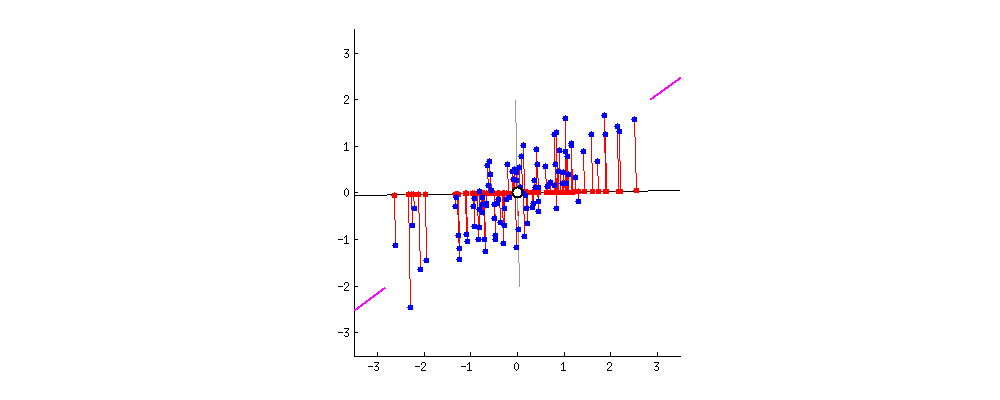

In [12]:
display(HTML(images_html[0]))


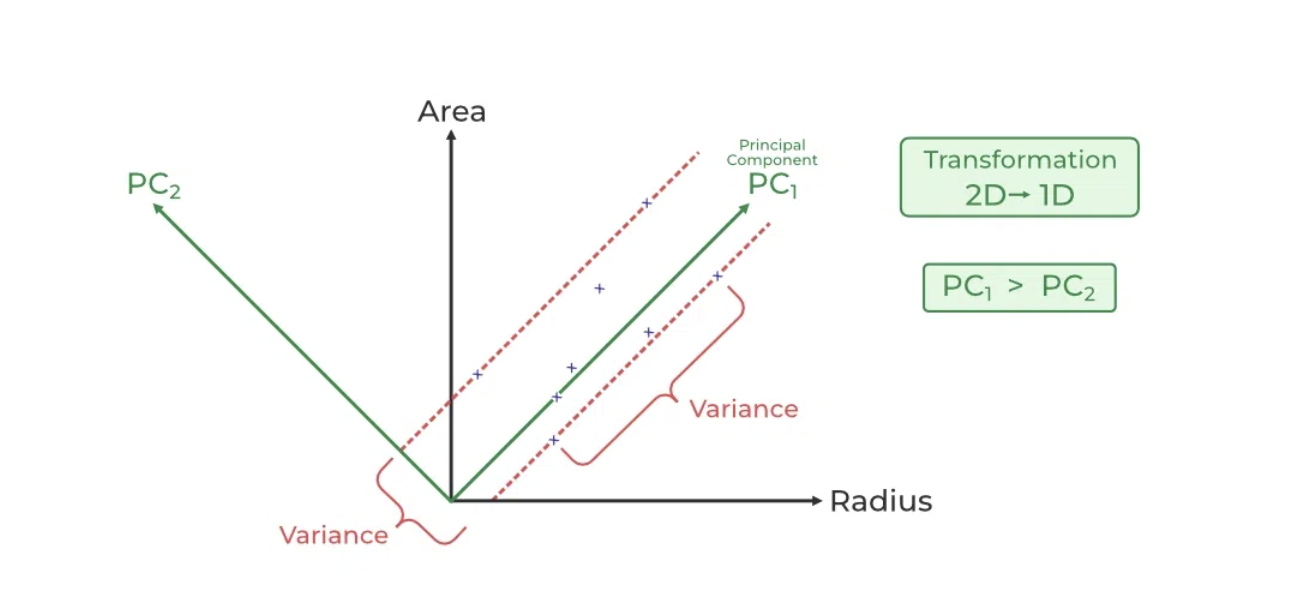

In [13]:
display(HTML(images_html[1]))


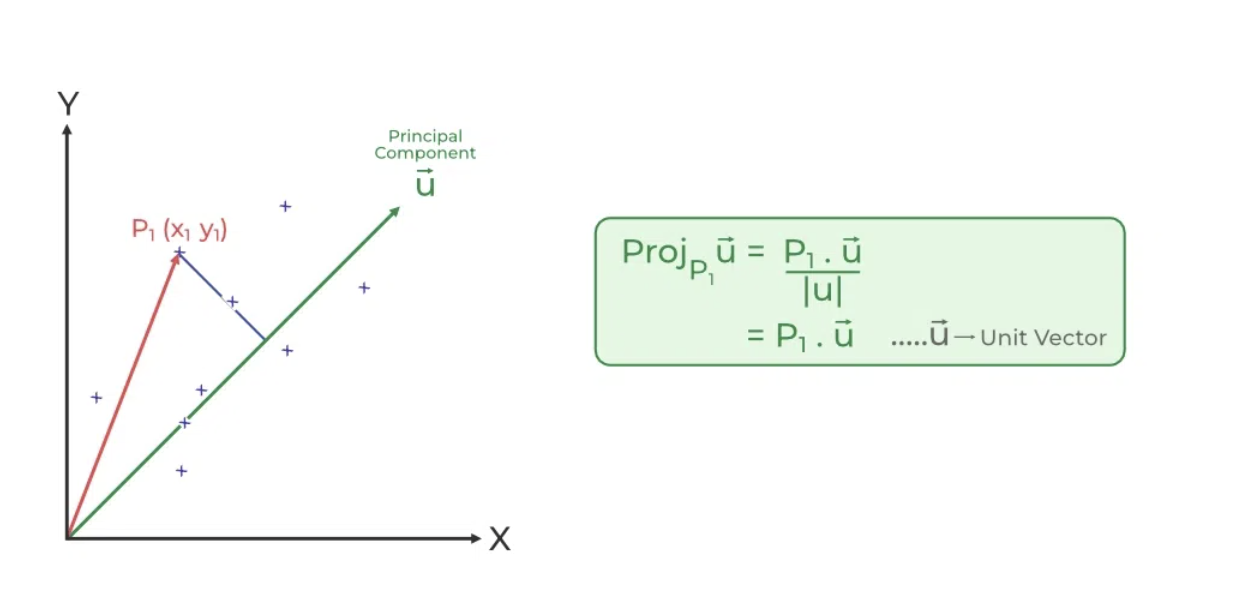

In [14]:
display(HTML(images_html[2]))


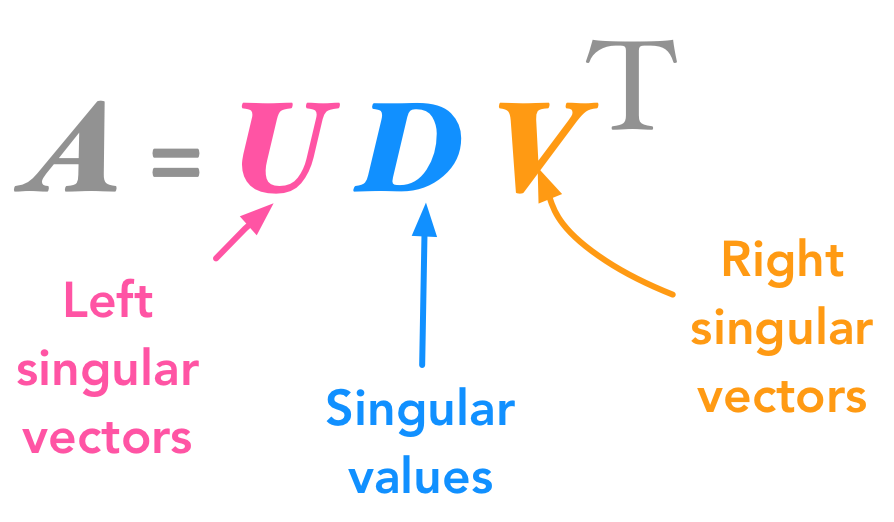

In [15]:
display(HTML(images_html[3]))


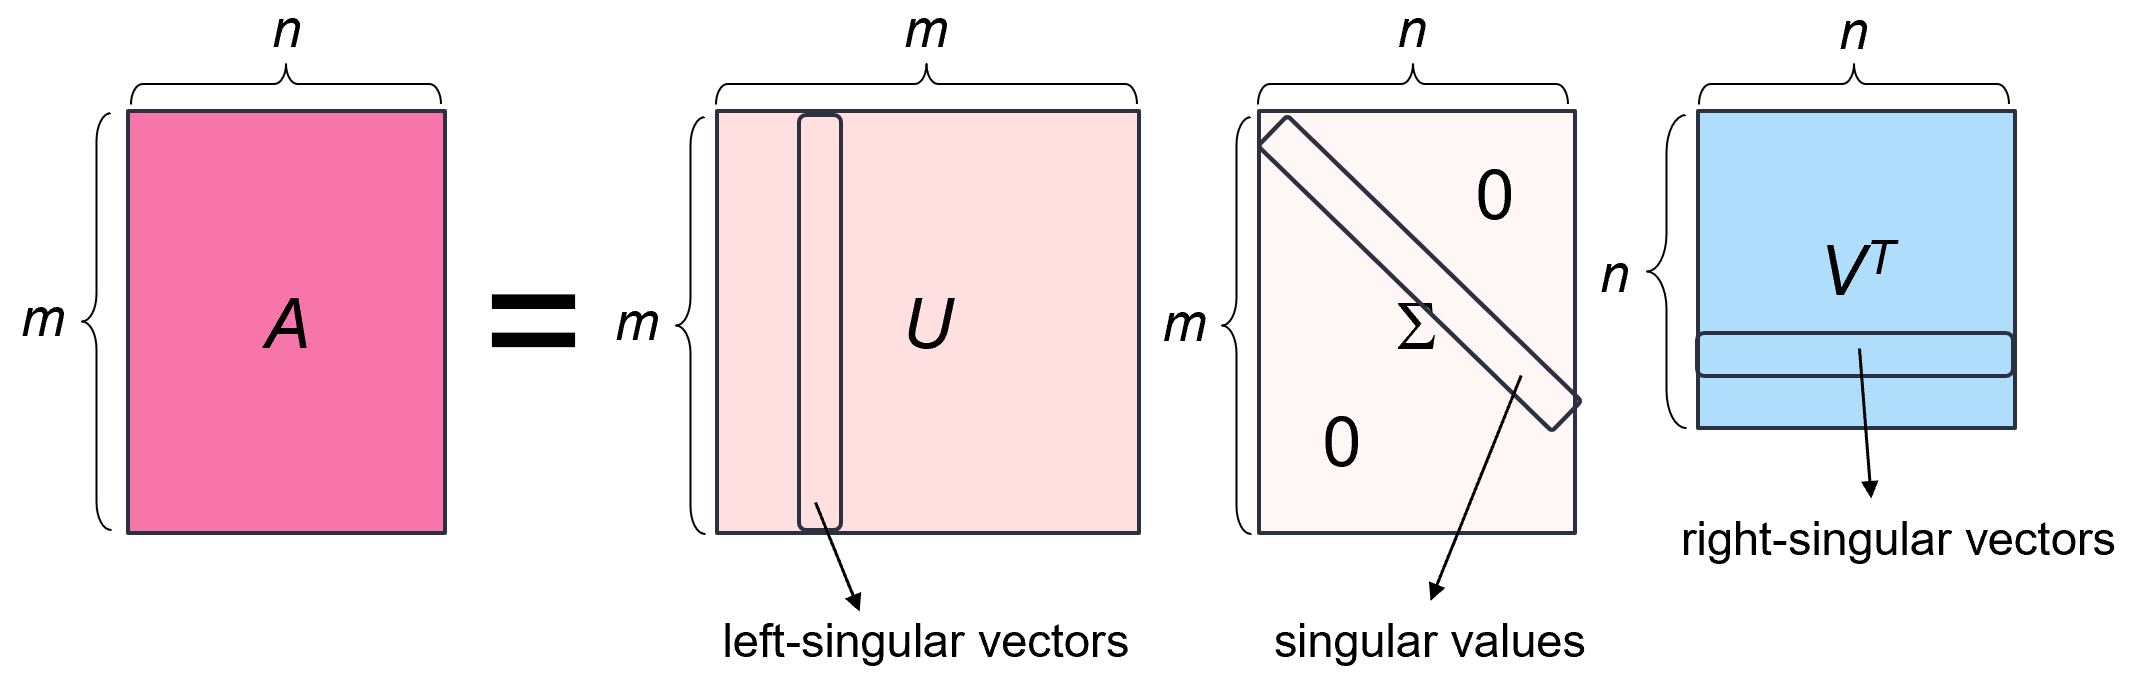

In [16]:
display(HTML(images_html[4]))


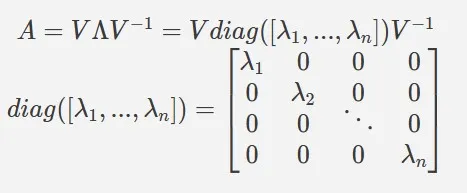

In [17]:
display(HTML(images_html[5]))

## Loading and Exploring Dataset

In [16]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

print(f"Raw data shape: X = {X.shape} (samples, features), y = {y.shape} (labels)")
X = X / 255.0

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Raw data shape: X = (70000, 784) (samples, features), y = (70000,) (labels)


In [10]:
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("-> Class distribution:-")
for key in class_distribution.keys():
    print("Item {} : {} count".format(key,class_distribution[key]))
print("-> There are {} images in the dataset".format(len(X)))
print("-> There are {} unique targets in the dataset".format(len(np.unique(y))))
print("-> Size of each image is {0}".format(X.shape))

-> Class distribution:-
Item 0 : 6903 count
Item 1 : 7877 count
Item 2 : 6990 count
Item 3 : 7141 count
Item 4 : 6824 count
Item 5 : 6313 count
Item 6 : 6876 count
Item 7 : 7293 count
Item 8 : 6825 count
Item 9 : 6958 count
-> There are 70000 images in the dataset
-> There are 10 unique targets in the dataset
-> Size of each image is (70000, 784)


## Applying PCA

In [11]:
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)
print("Explained variance ratio for the first 2 components:")
for idx, ratio in enumerate(pca_2d.explained_variance_ratio_, start=1):
    print(f"  Component {idx}: {ratio:.4f} ({ratio * 100:.2f}% of total variance)")

Explained variance ratio for the first 2 components:
  Component 1: 0.0564 (5.64% of total variance)
  Component 2: 0.0404 (4.04% of total variance)


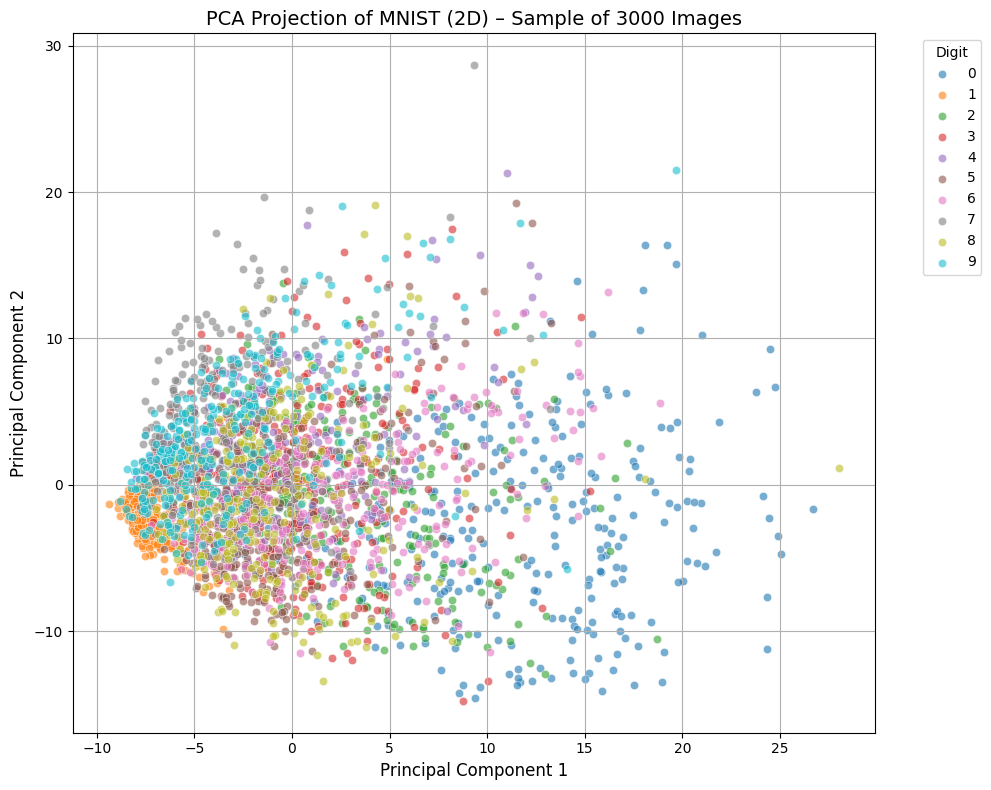

In [12]:
np.random.seed(42)
sample_size = 3000
indices_2d = np.random.choice(X_pca_2d.shape[0], size=sample_size, replace=False)

X_sampled_2d = X_pca_2d[indices_2d, :]
y_sampled_2d = y[indices_2d]

colors = plt.cm.tab10(np.arange(10))

plt.figure(figsize=(10, 8))
for digit in range(10):
    mask = (y_sampled_2d == digit)
    plt.scatter(
        X_sampled_2d[mask, 0],
        X_sampled_2d[mask, 1],
        c=colors[digit].reshape(1, -1),
        label=str(digit),
        alpha=0.6,
        edgecolors='w',
        linewidth=0.5
    )

plt.title("PCA Projection of MNIST (2D) – Sample of 3000 Images", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_scaled)
print("Explained variance ratio for the first 3 components:")
for idx, ratio in enumerate(pca_3d.explained_variance_ratio_, start=1):
    print(f"  Component {idx}: {ratio:.4f} ({ratio * 100:.2f}% of total variance)")

Explained variance ratio for the first 3 components:
  Component 1: 0.0564 (5.64% of total variance)
  Component 2: 0.0404 (4.04% of total variance)
  Component 3: 0.0374 (3.74% of total variance)


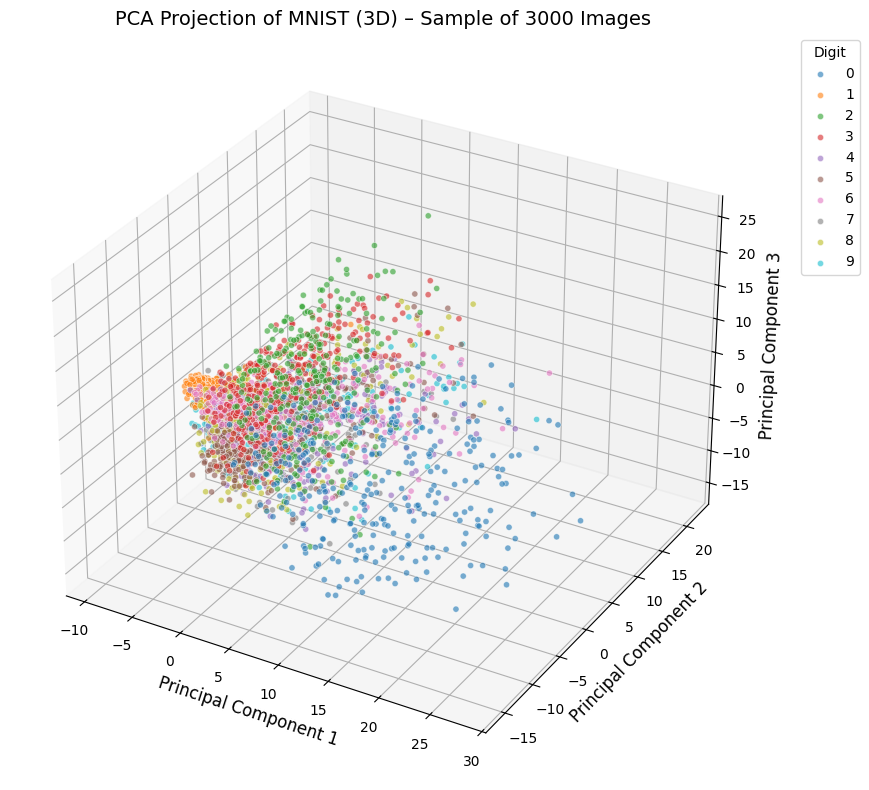

In [14]:
indices_3d = np.random.choice(X_pca_3d.shape[0], size=sample_size, replace=False)
X_sampled_3d = X_pca_3d[indices_3d, :]
y_sampled_3d = y[indices_3d]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for digit in range(10):
    mask = (y_sampled_3d == digit)
    ax.scatter(
        X_sampled_3d[mask, 0],
        X_sampled_3d[mask, 1],
        X_sampled_3d[mask, 2],
        c=colors[digit].reshape(1, -1),
        label=str(digit),
        alpha=0.6,
        edgecolors='w',
        linewidth=0.5,
        s=20
    )

ax.set_title("PCA Projection of MNIST (3D) – Sample of 3000 Images", fontsize=14)
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_zlabel("Principal Component 3", fontsize=12)
ax.legend(title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

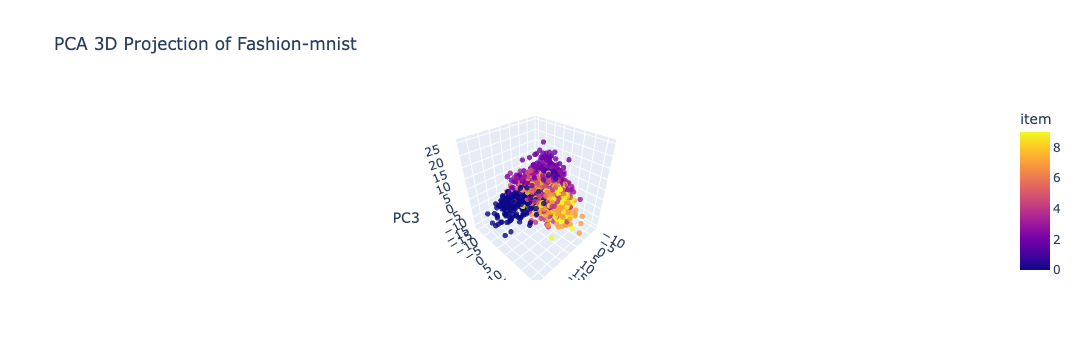

In [15]:
df_pca_3d = pd.DataFrame(X_sampled_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['label'] = y_sampled_3d
fig = px.scatter_3d(
    df_pca_3d,
    x='PC1', y='PC2', z='PC3',
    color='label',
    title='PCA 3D Projection of Fashion-mnist',
    labels={'label':'item'}
)
fig.update_traces(marker=dict(size=3, opacity=0.8))
fig.show()

## Scree Plot

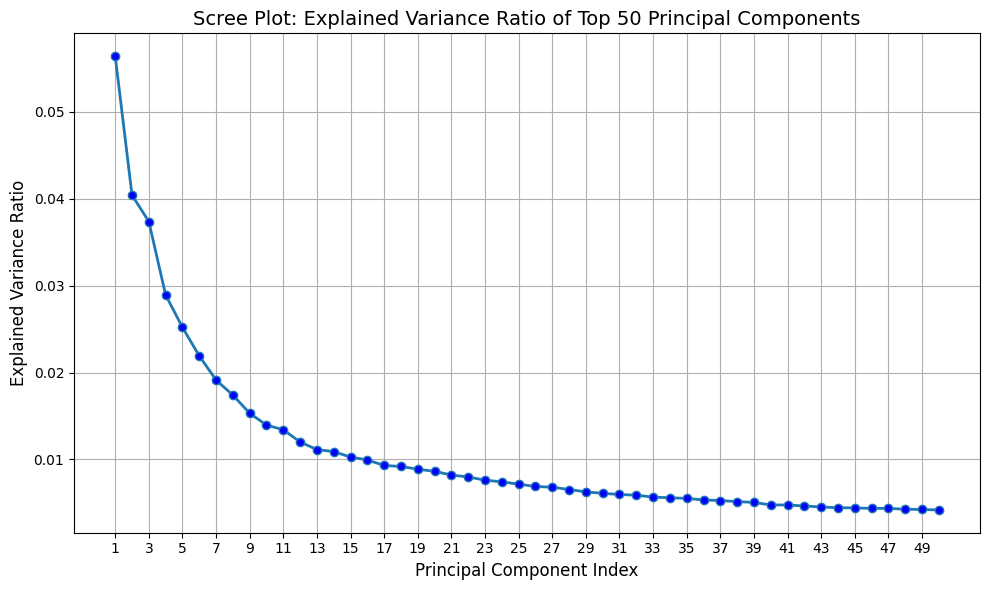

In [11]:
pca_full = PCA()  
pca_full.fit(X_scaled)

explained_variance_ratio_full = pca_full.explained_variance_ratio_
n_components_full = explained_variance_ratio_full.shape[0]

components_to_plot = 50

plt.figure(figsize=(10, 6))
plt.plot(
    np.arange(1, components_to_plot + 1),
    explained_variance_ratio_full[:components_to_plot],
    'o-',
    linewidth=2, markerfacecolor='blue', markersize=6
)

plt.title("Scree Plot: Explained Variance Ratio of Top 50 Principal Components", fontsize=14)
plt.xlabel("Principal Component Index", fontsize=12)
plt.ylabel("Explained Variance Ratio", fontsize=12)
plt.xticks(np.arange(1, components_to_plot + 1, step=2))
plt.grid(True)
plt.tight_layout()
plt.show()

## Classification

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=1/7, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (60000, 784)
Test set shape: (10000, 784)


In [20]:
clf_raw = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

start_time_raw = time.time()  
clf_raw.fit(X_train, y_train) # Fit on full-dimensional data
end_time_raw = time.time()

elapsed_time_raw = end_time_raw - start_time_raw
print(f"Training time on raw data: {elapsed_time_raw:.2f} seconds")

Training time on raw data: 7.31 seconds


In [21]:
y_pred_raw = clf_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"Accuracy on raw data: {accuracy_raw * 100:.2f}%")

Accuracy on raw data: 91.92%


In [22]:
n_components = 50

pca = PCA(n_components=n_components, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
clf_pca = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

start_time_pca = time.time() 
clf_pca.fit(X_train_pca, y_train) # Fit on reduced data
end_time_pca = time.time()

elapsed_time_pca = end_time_pca - start_time_pca
print(f"Training time on PCA-reduced data: {elapsed_time_pca:.2f} seconds")

Training time on PCA-reduced data: 1.41 seconds


In [24]:
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy on PCA-reduced data: {accuracy_pca * 100:.2f}%")

Accuracy on PCA-reduced data: 90.28%


#### 2D & 3D Clustering
- In both the 2D and 3D projections, each point represents one handwritten digit image projected onto the principal components.
- Points of the same color (same digit label) form clusters, indicating that PCA finds directions maximizing variance that align with digit class differences.
- Some clusters (e.g., “0” vs. “6”) may overlap because their pixel patterns share similarities in the top principal directions.
- In 3D, we often observe even clearer separation between certain digit pairs compared to 2D, because we have an extra axis to capture additional variance.

#### Scree Plot Interpretation
- The Scree plot shows how much of the dataset’s variance each principal component explains.
- Notice that the first few components (e.g., PC1, PC2, PC3) capture a substantial fraction of the variance (e.g., 10%, 8%, ~6%, etc.).
- As the component index increases, the explained variance ratio typically decays rapidly, forming a “elbow” in the plot. This elbow helps decide how many components to keep.
- For example, if the “elbow” appears around component 20, we might conclude that the first 20 components are sufficient to capture the majority of meaningful variance (>90%).
- Beyond that, additional components capture diminishing returns (very small amounts of variance).

#### Interpreting Explained Variance
- `explained_variance_ratio_[i]` tells us the fraction of total variance captured by the i-th component.
- The cumulative sum (e.g., `np.cumsum(pca.explained_variance_ratio_)`) indicates how many components we need to retain a desired fraction of total variance (e.g., 95% or 99%).
- In practice:
    n_components = 0.95  # keep the number of components necessary to explain 95% variance
    pca = PCA(n_components)
    Then PCA will automatically choose the smallest k satisfying `sum(explained_variance_ratio_[:k]) >= 0.95`.

#### Dimensionality Reduction and Variance Preservation
- By selecting only the top k eigenvectors, we project data onto a k-dimensional subspace.
- This reduces noise and redundancy while preserving the directions with highest variance.
- The property that the chosen subspace captures the most variance is why PCA is effective for preprocessing.
- For MNIST, most variance is due to differences in stroke thickness, orientation, and digit class shape.

#### Key PCA Concepts Revisited
- Eigenvectors: Directions in the original 784-dimensional pixel space along which variance is maximized.
- Eigenvalues: Measure of how much variance lies along each eigenvector. Larger eigenvalues → more “informational” directions.
- Dimensionality Reduction: By projecting onto the top-k eigenvectors, we reduce the number of features from 784 → k. This simplifies data while preserving variance.
- Variance Preservation: The sum of the top-k eigenvalues divided by the sum of all eigenvalues equals the cumulative explained variance ratio. This quantifies how much of the dataset’s information is retained.
- Scree Plot: Visual tool for selecting k. Look for the “elbow” where explained variance levels off to decide the number of components to keep.

#### Effect on Classification
- Reducing dimensions can remove noise features and correlations that do not help classification.
- Lower-dimensional data often speeds up classifier training and inference significantly.
- If classification performance remains similar after PCA, this implies that most discriminative information was contained in the principal components, not in discarded components.
- If performance drops notably, it suggests that some discarded dimensions carried important class-specific variance.